In [ ]:
#匯入資料並讀取
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(images_train, labels_train), (images_test, labels_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#images取4維特徵
images_train4D=images_train.reshape(images_train.shape[0],28,28,1).astype('float32')
images_test4D=images_test.reshape(images_test.shape[0],28,28,1).astype('float32')

In [ ]:
#mages特徵標準化
images_train4D_normalize=images_train4D/255
images_test4D_normalize=images_test4D/255
print(images_train4D_normalize[0])

In [ ]:
#labels 標準化
import numpy as np
import pandas as pd
from tensorflow.python.keras.utils.np_utils import to_categorical
labels_trainOneHot=to_categorical(labels_train)
labels_testOneHot=to_categorical(labels_test)
print(labels_trainOneHot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model=Sequential()
model.add(Conv2D(filters=16,
 kernel_size=(5,5),
 padding='same',
 input_shape=(28,28,1),
 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36,
 kernel_size=(5,5),
 padding='same',
 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [ ]:
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:
train_history=model.fit(x=images_train4D_normalize,
 y=labels_trainOneHot,
 validation_split=0.2,
 epochs=10,
 batch_size=300,
 verbose=2)

Epoch 1/10
160/160 - 56s - loss: 0.4886 - accuracy: 0.8488 - val_loss: 0.1051 - val_accuracy: 0.9674
Epoch 2/10
160/160 - 54s - loss: 0.1365 - accuracy: 0.9590 - val_loss: 0.0671 - val_accuracy: 0.9799
Epoch 3/10
160/160 - 52s - loss: 0.0982 - accuracy: 0.9711 - val_loss: 0.0543 - val_accuracy: 0.9842
Epoch 4/10
160/160 - 52s - loss: 0.0794 - accuracy: 0.9764 - val_loss: 0.0494 - val_accuracy: 0.9849
Epoch 5/10
160/160 - 52s - loss: 0.0685 - accuracy: 0.9793 - val_loss: 0.0456 - val_accuracy: 0.9864
Epoch 6/10
160/160 - 52s - loss: 0.0601 - accuracy: 0.9818 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 7/10
160/160 - 52s - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0357 - val_accuracy: 0.9896
Epoch 8/10
160/160 - 54s - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.0342 - val_accuracy: 0.9904
Epoch 9/10
160/160 - 54s - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 10/10
160/160 - 53s - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0351 - val_accura

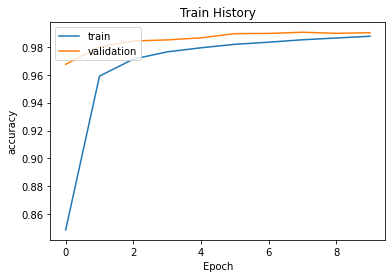

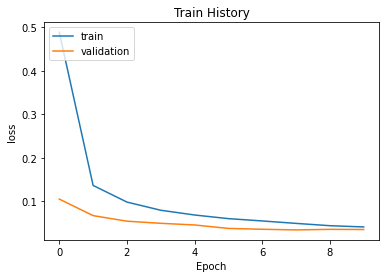

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
 plt.plot(train_history.history[train])
 plt.plot(train_history.history[validation])
 plt.title('Train History')
 plt.ylabel(train)
 plt.xlabel('Epoch')
 plt.legend(['train','validation'],loc='upper left')
 plt.show()
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
scores=model.evaluate(images_test4D_normalize,labels_testOneHot,verbose=1)
print(scores)
print('accuracy=',scores[1])

313/313 [==============================] - 7s 20ms/step - loss: 0.0239 - accuracy: 0.9918
[0.023899786174297333, 0.9918000102043152]
accuracy= 0.9918000102043152


In [ ]:
prediction=model.predict_classes(images_test4D)
print(prediction[:10])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[7 2 1 0 4 1 4 9 5 9]


In [ ]:
import pandas as pd
pd.crosstab(labels_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,1,0,2,1,1,0
1,0,1133,1,1,0,0,0,0,0,0
2,1,3,1021,0,1,0,0,5,1,0
3,0,0,1,1005,0,1,0,2,1,0
4,0,0,0,0,982,0,0,0,0,0
5,2,0,0,2,0,883,2,1,1,1
6,3,2,0,0,2,3,948,0,0,0
7,0,3,3,1,0,0,0,1020,1,0
8,1,1,2,1,1,1,0,3,961,3


In [ ]:
df=pd.DataFrame({'label':labels_test,'predict':prediction})
print(df[:10])

   label  predict
0      7        7
1      2        2
2      1        1
3      0        0
4      4        4
5      1        1
6      4        4
7      9        9
8      5        5
9      9        9


In [35]:
df[(df.label==0)&(df.predict==4)]

,label,predict
6400,0,4


In [26]:
df[(df.label==0)&(df.predict==6)]

,label,predict
1621,0,6
8325,0,6


In [27]:
df[(df.label==0)&(df.predict==7)]

,label,predict
6597,0,7


In [28]:
df[(df.label==0)&(df.predict==8)]

,label,predict
6651,0,8


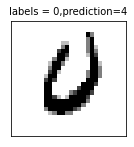

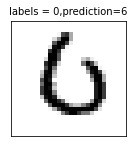

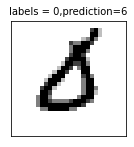

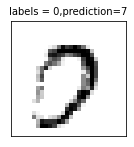

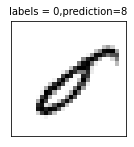

In [36]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx,num=10):
 fig = plt.gcf()
 fig.set_size_inches(12, 14) #設定圖形⼤⼩
 if num>25: num=25
 for i in range(0,num):
  ax=plt.subplot(5,5,1+i) #建立subgraph ⼦圖形5⾏*5列
  ax.imshow(images[idx],cmap='binary')# 畫出subgraphy⼦圖形
  title ='labels = '+str(labels[idx])#⼦圖形標籤
  if len(prediction)>0: # 如果有預測值
    title+=",prediction="+str(prediction[idx]) # 標題加預測結果

 ax.set_title(title,fontsize=10) # 標題設定字體⼤⼩
 ax.set_xticks([]);ax.set_yticks([]) # 不顯⽰刻度
 idx+=1
 plt.show()
#plot_images_labels_prediction(images_train, labels_train, prediction, 1621,1)
plot_images_labels_prediction(images_test, labels_test, prediction, 6400,1)
plot_images_labels_prediction(images_test, labels_test, prediction, 1621,1)
plot_images_labels_prediction(images_test, labels_test, prediction, 8325,1)
plot_images_labels_prediction(images_test, labels_test, prediction, 6597,1)
plot_images_labels_prediction(images_test, labels_test, prediction, 6651,1)